In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
import re
import numpy as np

# Set the global font to be 'Times New Roman', applies to all text elements
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 18

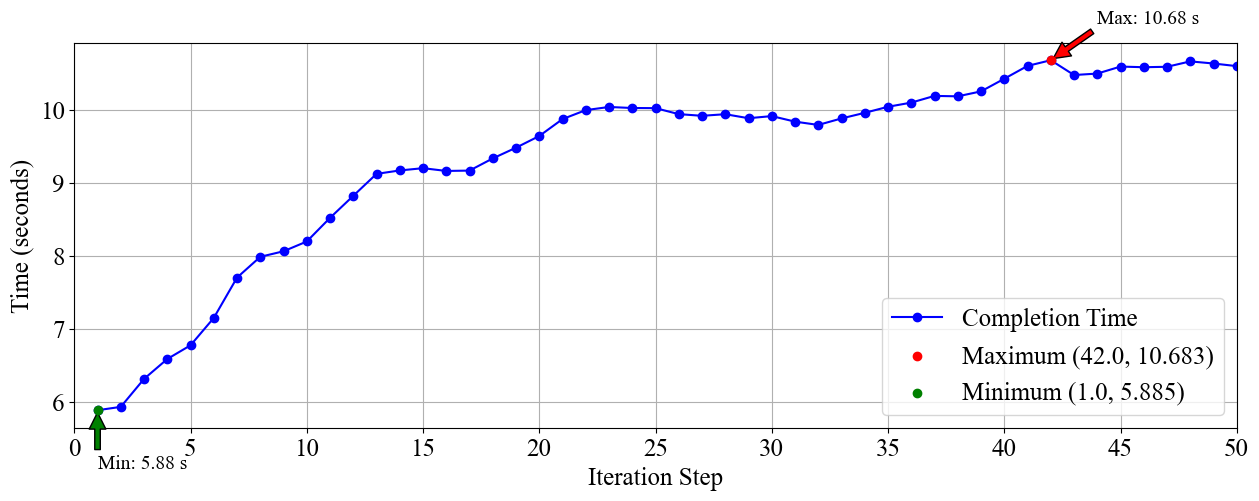

In [15]:
# Load the previously created CSV file
df = pd.read_csv('serial.csv') 
# Adjust the step numbers to start from 1 instead of 0
df['step'] = df['step'] + 1


# Identify the new maximum and minimum points
max_point = df.loc[df['time'].idxmax()]
min_point = df.loc[df['time'].idxmin()]

# Plot the adjusted data
plt.figure(figsize=(15, 5))
plt.plot(df['step'], df['time'], marker='o', linestyle='-', color='b', label='Completion Time')

# Highlight the maximum and minimum points
plt.scatter(max_point['step'], max_point['time'], color='r', zorder=5, label=f'Maximum ({max_point["step"]}, {max_point["time"]:.3f})')
plt.scatter(min_point['step'], min_point['time'], color='g', zorder=5, label=f'Minimum ({min_point["step"]}, {min_point["time"]:.3f})')

# Annotate the points
plt.annotate(f'Max: {max_point["time"]:.2f} s', xy=(max_point['step'], max_point['time']),
             xytext=(max_point['step'] + 2, max_point['time'] + 0.5),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=14)

plt.annotate(f'Min: {min_point["time"]:.2f} s', xy=(min_point['step'], min_point['time']),
             xytext=(min_point['step'] , min_point['time'] - 0.8),
             arrowprops=dict(facecolor='green', shrink=0.05), fontsize=14)

# Add labels and grid
# plt.title('Step Completion Time (Steps 1 to 50) with Max and Min Points')
plt.xlabel('Iteration Step')
plt.ylabel('Time (seconds)')
plt.grid(True)

# Set x-ticks and range
plt.xticks(range(0, 51, 5))
plt.xlim(0, 50)

plt.legend()
plt.show()


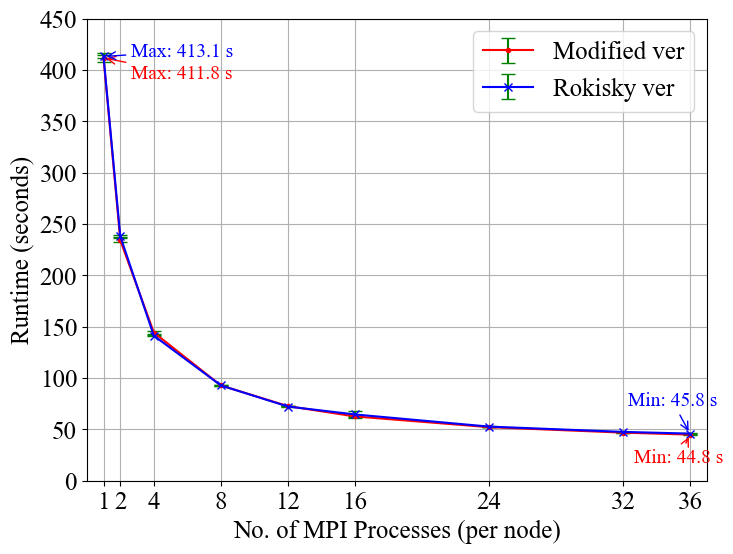

In [16]:
# Read data from CSV file
df = pd.read_csv('single_node.csv')
df_v2 = pd.read_csv('single_node_rsky.csv')

# Calculate standard deviation for each version
df['StdDev'] = df[['Run1', 'Run2', 'Run3']].std(axis=1)
df_v2['StdDev'] = df_v2[['Run1', 'Run2', 'Run3']].std(axis=1)

# Plotting the runtime with error bars
plt.figure(figsize=(8,6))
plt.errorbar(df["Processes"], df["Average"], yerr=df["StdDev"], fmt='.-', label='Modified ver', capsize=5, color='red', ecolor='green')
plt.errorbar(df_v2["Processes"], df_v2["Average"], yerr=df_v2["StdDev"], fmt='x-', label='Rokisky ver', capsize=5, color='blue', ecolor='green')

# Annotate max and min for df (Modified version)
max_idx = df["Average"].idxmax()
min_idx = df["Average"].idxmin()
plt.annotate(f'Max: {df["Average"][max_idx]:.1f} s', xy=(df["Processes"][max_idx], df["Average"][max_idx]), xytext=(20, -15),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'), color='red', fontsize=14)
plt.annotate(f'Min: {df["Average"][min_idx]:.1f} s', xy=(df["Processes"][min_idx], df["Average"][min_idx]), xytext=(-40, -20),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'), color='red', fontsize=14)

# Annotate max and min for df_v2 (Rokisky version)
max_idx_v2 = df_v2["Average"].idxmax()
min_idx_v2 = df_v2["Average"].idxmin()
plt.annotate(f'Max: {df_v2["Average"][max_idx_v2]:.1f} s', xy=(df_v2["Processes"][max_idx_v2], df_v2["Average"][max_idx_v2]), xytext=(20, 0),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', color='blue'), color='blue', fontsize=14)
plt.annotate(f'Min: {df_v2["Average"][min_idx_v2]:.1f} s', xy=(df_v2["Processes"][min_idx_v2], df_v2["Average"][min_idx_v2]), xytext=(-45, 20),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', color='blue'), color='blue', fontsize=14)

plt.xlabel("No. of MPI Processes (per node)")
plt.ylabel("Runtime (seconds)")
plt.legend()
plt.grid(True)
plt.xticks(df["Processes"])
plt.xlim(0, 37)
plt.ylim(0, 450)

plt.show()


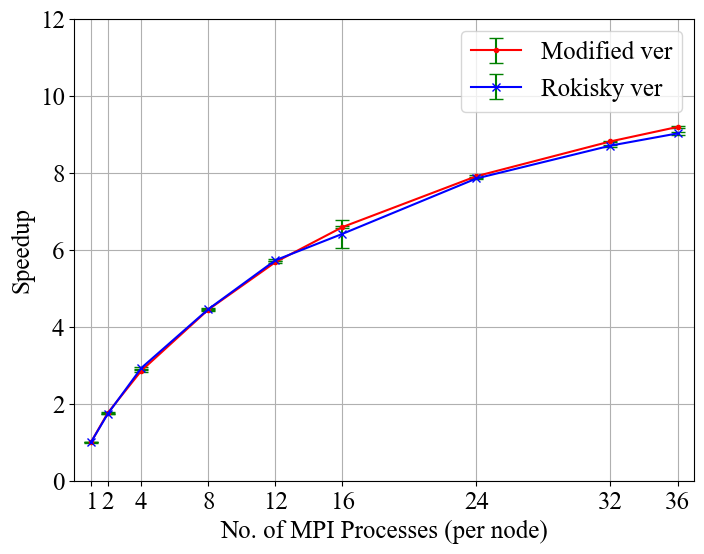

In [17]:
# Calculate speedup and standard deviation of speedup
serial_time = df["Average"][8]
df["Speedup"] = serial_time / df["Average"]
df["SpeedupStdDev"] = df["Speedup"] * (df["StdDev"] / df["Average"])

serial_time_v2 = df_v2["Average"][8]
df_v2["Speedup"] = serial_time_v2 / df_v2["Average"]
df_v2["SpeedupStdDev"] = df_v2["Speedup"] * (df_v2["StdDev"] / df_v2["Average"])

# Plotting the speedup with error bars
plt.figure(figsize=(8,6))
plt.errorbar(df["Processes"], df["Speedup"], yerr=df["SpeedupStdDev"], fmt='.-', color='red', label='Modified ver', capsize=5, ecolor='green')
plt.errorbar(df_v2["Processes"], df_v2["Speedup"], yerr=df_v2["SpeedupStdDev"], fmt='x-', color='blue', label='Rokisky ver', capsize=5, ecolor='green')

plt.xlabel("No. of MPI Processes (per node)")
plt.ylabel("Speedup")
plt.legend()
plt.grid(True)
plt.xticks(df["Processes"])
plt.xlim(0, 37)
plt.ylim(0, 12)
plt.show()

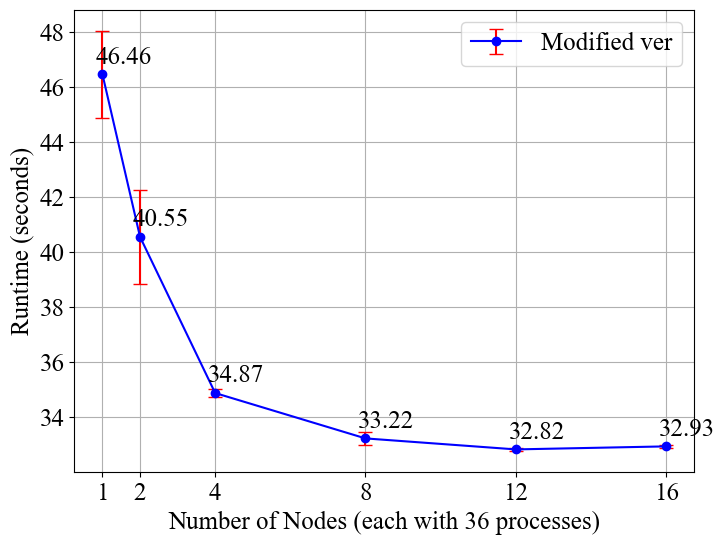

In [18]:
# Read data from CSV file
df = pd.read_csv('multi_nodes.csv')
df['StdDev'] = df[['Run1', 'Run2', 'Run3']].std(axis=1)

# Plotting the results with specified colors
plt.figure(figsize=(8, 6))
error_bars = plt.errorbar(df["Nodes"], df["Average"], yerr=df["StdDev"], fmt='-o', label='Modified ver', capsize=5, color='blue', ecolor='red')

plt.xlabel("Number of Nodes (each with 36 processes)")
plt.ylabel("Runtime (seconds)")
plt.legend()
plt.grid(True)
plt.xticks(df["Nodes"])

# Annotating each data point with its runtime using plt.annotate
for i, txt in enumerate(df["Average"]):
    plt.annotate(f'{txt:.2f}',  # Text to display
                 (df["Nodes"][i], df["Average"][i]),  # Point to annotate
                 textcoords="offset points",  # Coordinate system for text
                 xytext=(15,8),  # Distance from text to points (x,y)
                 ha='center')  # Horizontal alignment can be left, right or center

plt.show()


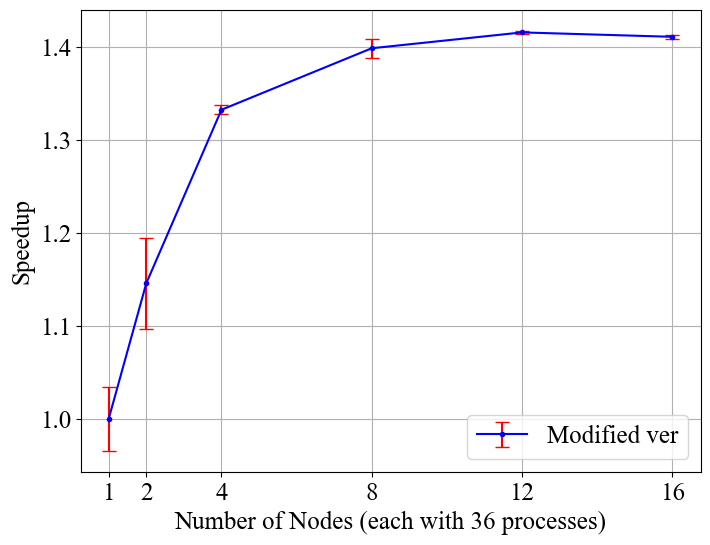

In [19]:
serial_time = df["Average"][0]
df["Speedup"] = serial_time / df["Average"]
df["SpeedupStdDev"] = df["Speedup"] * (df["StdDev"] / df["Average"])

# Plotting the speedup
plt.figure(figsize=(8, 6))
plt.errorbar(df["Nodes"], df["Speedup"], yerr=df["SpeedupStdDev"], fmt='.-', color='blue', label='Modified ver', capsize=5, ecolor='red')

plt.xlabel("Number of Nodes (each with 36 processes)")
plt.ylabel("Speedup")
# plt.title("Speedup vs Number of Nodes")
plt.legend()
plt.grid(True)
plt.xticks(df["Nodes"])

plt.show()

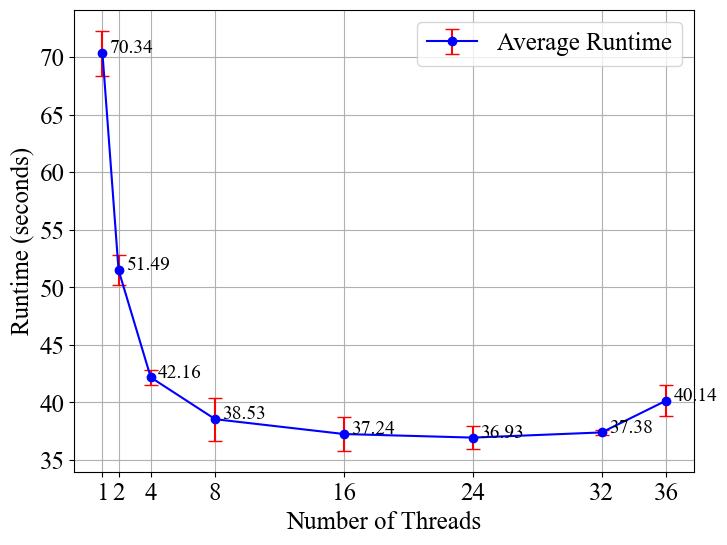

In [8]:
# Read data from CSV file
df = pd.read_csv('multi_threads_16nodes.csv')
df['StdDev'] = df[['Run1', 'Run2', 'Run3']].std(axis=1)

# Plotting the results with specified colors
plt.figure(figsize=(8, 6))
error_bars = plt.errorbar(df["Threads"], df["Average"], yerr=df["StdDev"], fmt='-o', label='Average Runtime', capsize=5, color='blue', ecolor='red')

plt.xlabel("Number of Threads")
plt.ylabel("Runtime (seconds)")
plt.legend()
plt.grid(True)
plt.xticks(df["Threads"])

# Annotate each data point with its average runtime
for i, (x, y) in enumerate(zip(df["Threads"], df["Average"])):
    plt.annotate(f'{y:.2f}', xy=(x, y), textcoords="offset points", xytext=(21,0), ha='center', fontsize=14)

plt.show()


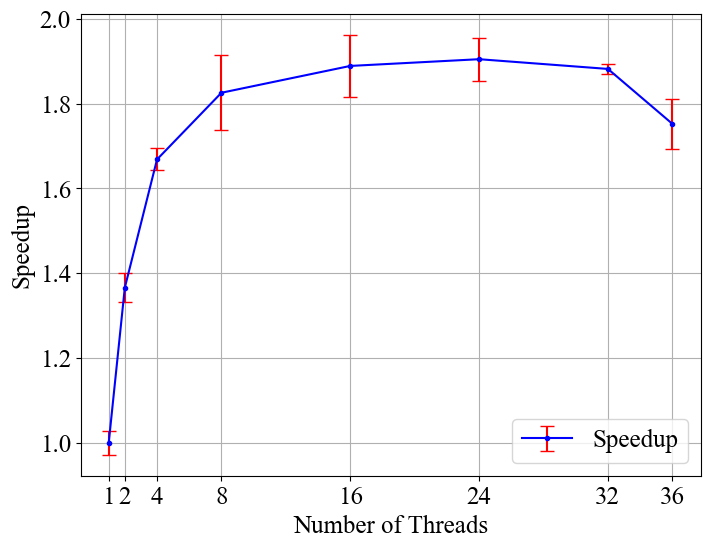

In [9]:
serial_time = df["Average"][0]
df["Speedup"] = serial_time / df["Average"]
df["SpeedupStdDev"] = df["Speedup"] * (df["StdDev"] / df["Average"])
# Plotting the speedup
plt.figure(figsize=(8, 6))
plt.errorbar(df["Threads"], df["Speedup"], yerr=df["SpeedupStdDev"], fmt='.-', color='blue', label='Speedup', capsize=5, ecolor='red')
# plt.plot(df["Threads"], df["Speedup"], marker='.', color='blue', label='Speedup')
plt.xlabel("Number of Threads")
plt.ylabel("Speedup")
# plt.title("Speedup vs Number of Threads")
plt.legend()
plt.grid(True)
plt.xticks(df["Threads"])

plt.show()

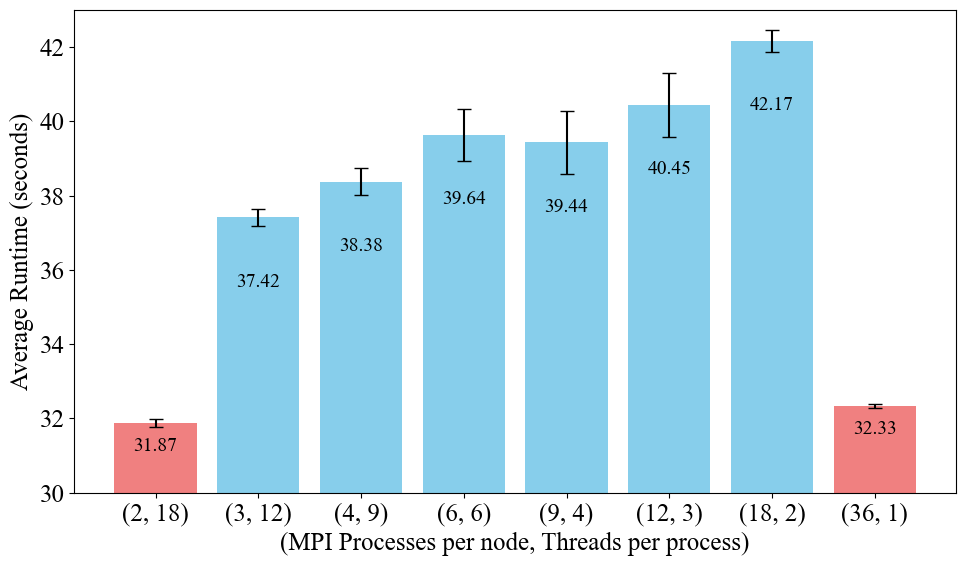

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Read data from CSV file
df = pd.read_csv('multi_threads.csv')

# Calculate standard deviation for each row
df['Error'] = df[['Run1', 'Run2', 'Run3']].std(axis=1)

# Create a new column for the (threads, processes) pair as strings
df['Processes_Threads'] = df.apply(lambda row: f"({int(row['Processes'])}, {int(row['Threads'])})", axis=1)

# Sort the data by the number of threads
df = df.sort_values(by='Processes')

# Plotting as a bar chart
plt.figure(figsize=(10, 6))

# Create colors based on the condition and set a lower opacity
colors = ['lightcoral' if x < 35 else 'skyblue' for x in df['Average']]

bars = plt.bar(df['Processes_Threads'], df['Average'], yerr=df['Error'], capsize=5,
               color=colors, label='Average Runtime')  # Apply alpha here

# Annotate each bar with its height value
for bar in bars:
    yval = bar.get_height()
    offset = (0,-20) if yval < 35 else (0,-50)
    plt.annotate(f'{yval:.2f}', xy=(bar.get_x() + bar.get_width()/2, yval),
                 textcoords="offset points", xytext=offset, ha='center', fontsize=14)

plt.xlabel('(MPI Processes per node, Threads per process)')
plt.ylabel('Average Runtime (seconds)')
# plt.legend()
plt.ylim(30, 43)  # Adjusted y-axis range
plt.tight_layout()  # Adjust subplot parameters to give the plot enough space
plt.show()


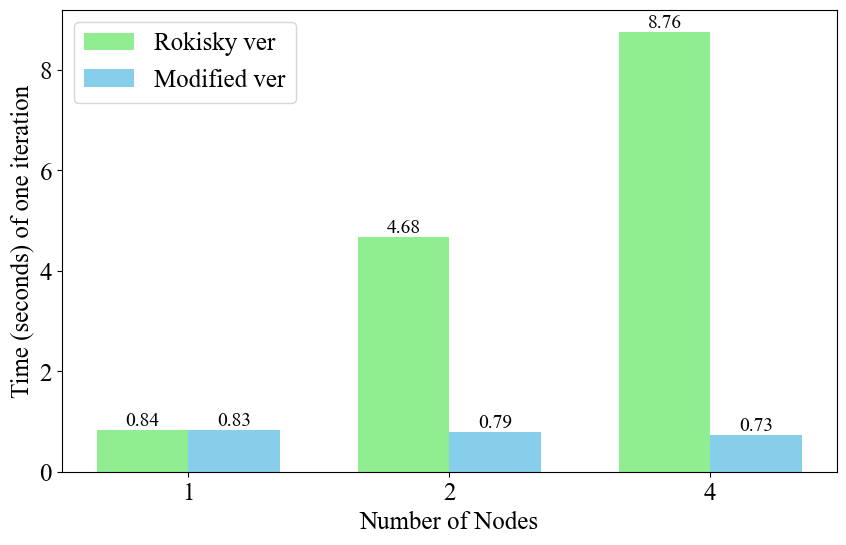

In [11]:
# Updated data with new entries
data = [
    {"Version": "Rokisky ver", "Nodes": 1, "Processes": 36, "Threads": 1, "Particles": 105, "Iterations": 5, "Time (seconds)": 0.84},
    {"Version": "Modified ver", "Nodes": 1, "Processes": 36, "Threads": 1, "Particles": 105, "Iterations": 5, "Time (seconds)": 0.83},
    {"Version": "Rokisky ver", "Nodes": 2, "Processes": 36, "Threads": 1, "Particles": 105, "Iterations": 5, "Time (seconds)": 4.68},
    {"Version": "Modified ver", "Nodes": 2, "Processes": 36, "Threads": 1, "Particles": 105, "Iterations": 5, "Time (seconds)": 0.79},
    {"Version": "Rokisky ver", "Nodes": 4, "Processes": 36, "Threads": 1, "Particles": 105, "Iterations": 5, "Time (seconds)": 8.76},
    {"Version": "Modified ver", "Nodes": 4, "Processes": 36, "Threads": 1, "Particles": 105, "Iterations": 5, "Time (seconds)": 0.73},
]

# Convert to DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))

# Unique nodes for plotting
versions = df['Version'].unique()
nodes = df['Nodes'].unique()
nodes.sort()

# Define bar width and positions
bar_width = 0.35
bar_positions = np.arange(len(nodes))

# Define colors for each version
colors = {'Rokisky ver': 'lightgreen', 'Modified ver': 'skyblue'}

# Plot each version's data
for i, version in enumerate(versions):
    subset = df[df['Version'] == version]
    # Ensure bar positions align with all node configurations
    positions = [np.where(nodes == node)[0][0] for node in subset['Nodes']]
    bars = plt.bar(np.array(positions) + i * bar_width, subset['Time (seconds)'], bar_width, label=version, color=colors[version])
    
    # Annotate the time on each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', va='bottom', ha='center', fontsize=14, color='black')

# Set labels and title
plt.xlabel('Number of Nodes')
plt.ylabel('Time (seconds) of one iteration')
# plt.title('Execution Time by Version and Number of Nodes')
plt.xticks(bar_positions + bar_width / 2, nodes)
plt.legend()

plt.show()


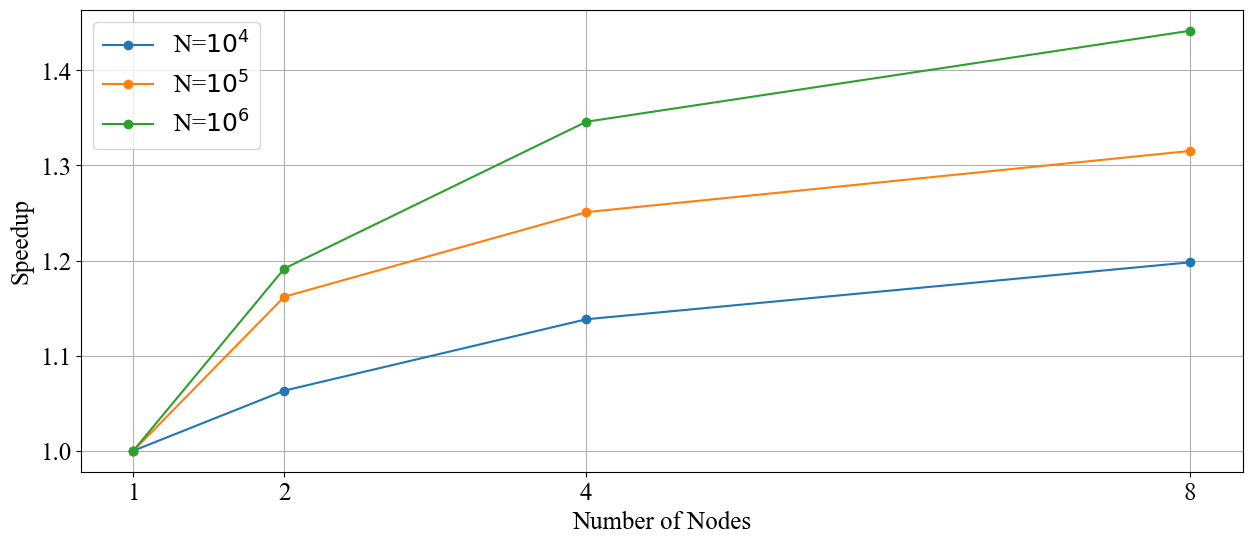

In [12]:
df = pd.read_csv('strong_scaling.csv')

# Group data by Particles
grouped = df.groupby('Particles')

# Plotting
plt.figure(figsize=(15, 6))

for particle, data in grouped:
    # Calculate speedup
    speedup = data['Average'].iloc[0] / data['Average']
    # Convert particles to scientific notation
    particle_label = f"N=$10^{int(np.log10(particle))}$"
    plt.plot(data['Nodes'], speedup, marker='o', linestyle='-', label=particle_label)


# plt.title('Strong Scaling: Speedup vs Nodes')
plt.xlabel('Number of Nodes')
plt.ylabel('Speedup')
plt.xticks(data['Nodes'])
plt.legend()
plt.grid(True)
plt.show()
